# Analysis 2

#### Stats for each team per game (Goals scored, Shots, Yellow cards and Red cards) 
#### Find out above stats for a team in consideration (home and away)
#### Plot 4 box plots/violin plots each with one of the above stats for all teams
#### Plot 2 point plot to show what is the ratio of each team scoring and taking shots at target vs opposition
#### This analysis gives insight of the team performance

In [1]:
#Import statements
import json, os, glob, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns, pandas as pd, numpy as np, itertools
import matplotlib.patches as mpatches
from datetime import datetime
from pandas import DataFrame
from datetime import timedelta

In [2]:
# Get the path for response to load the json from
current_dir = os.path.dirname('__file__')
matches_dir = os.path.join(current_dir, '..', 'data','eventsseason','*.json')

In [3]:
team_name = []
team_score = []
team_shots = []
team_yellow_cards = []
team_red_cards = []
all_teams = []

# Get the list of all events/matches and store in a variable
for filename in glob.glob(matches_dir):
    with open(filename) as team_file:
        file = json.load(team_file)
        
        # Get team names
        team_name = [event['strHomeTeam'] for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1) ]
        team_name.extend([event['strAwayTeam'] for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)])
                
        # Get team scores
        team_score = [int(event['intHomeScore']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
        team_score.extend([int(event['intAwayScore']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)])
        
        # Get team shots on target
        team_shots = [int(event['intHomeShots']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
        team_shots.extend([int(event['intAwayShots']) for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)])
        
        # Get team yellow card count
        team_yellow_cards = [len(event['strHomeYellowCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
        team_yellow_cards.extend([len(event['strAwayYellowCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)])
        
        # Get team red card count
        team_red_cards = [len(event['strHomeRedCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
        team_red_cards.extend([len(event['strAwayRedCards'].split(';'))-1 for event in file['events'] if datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)])
        
        # Count occurance of each team name in json response
        d = {x:team_name.count(x) for x in team_name}
        
        #Remove duplicates to get unique name for each team
        all_teams = list(set(team_name))
        
        data = pd.DataFrame([])
        
        for team in all_teams:
            # To get number of matches played by each team, count the occurance of each team name in dict
            for k,v in d.items():
                if k == team:
                    current_team_count = v 
                    break;
            # Goals scored by team vs opposition data collection
            goals_scored_home = [int(event['intHomeScore']) for event in file['events'] if event['strHomeTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            goals_scored_away = [int(event['intAwayScore']) for event in file['events'] if event['strAwayTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            goals_scored_opp_home = [int(event['intHomeScore']) for event in file['events'] if event['strAwayTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            goals_scored_opp_away = [int(event['intAwayScore']) for event in file['events'] if event['strHomeTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            total_goals_scored=sum(goals_scored_away)+sum(goals_scored_home)
            total_goals_scored_opp=sum(goals_scored_opp_away)+sum(goals_scored_opp_home)
            
            # Shots on target by team vs opposition data collection
            shots_home = [int(event['intHomeShots']) for event in file['events'] if event['strHomeTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            shots_away = [int(event['intAwayShots']) for event in file['events'] if event['strAwayTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            shots_opp_home = [int(event['intHomeShots']) for event in file['events'] if event['strAwayTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            shots_opp_away = [int(event['intAwayShots']) for event in file['events'] if event['strHomeTeam']==team and datetime.strptime(event['strDate'], '%d/%m/%y') < datetime.now() - timedelta(days=1)]
            total_shots=sum(shots_away)+sum(shots_home)
            total_shots_opp=sum(shots_opp_away)+sum(shots_opp_home)
            
            # Add values to dataframe
            data = data.append(pd.DataFrame({'team': team, 'played': current_team_count, 'score':total_goals_scored, 'opp_score':total_goals_scored_opp, 'shots': total_shots, 'opp_shots':total_shots_opp}, index=[0]), ignore_index=True)

In [4]:
# Generating and rearranging the dataframe
team_df = DataFrame({'team' :team_name, 'score': team_score, 'shots': team_shots, 'yellow_cards': team_yellow_cards, 'red_cards': team_red_cards})
team_df = team_df[['team', 'score', 'shots', 'yellow_cards', 'red_cards']]
team_df.head()

,team,score,shots,yellow_cards,red_cards
0,Hull,2,5,2,0
1,Crystal Palace,0,4,2,0
2,Everton,1,6,0,0
3,Middlesbrough,1,2,3,0
4,Burnley,0,3,3,0


In [5]:
# Copy data to 2 different data frames to sort the dataframe by shots and scores for each team vs opposition team respectively
data_shots = data
data_score = data

# Get number of shots on target by each team vs opposition
data_shots['shotsPerGame'] = round(data_shots['shots']/data_shots['played'],2)
data_shots['oppShotsPerGame'] = round(data_shots['opp_shots']/data_shots['played'],2)

# Get number of goals scored by each team vs opposition
data_score['goalsPerGame'] = round(data_score['score']/data_score['played'],2)
data_score['oppGoalsPerGame'] = round(data_score['opp_score']/data_score['played'],2)

# Sort in descending order of shots and goals be each team vs opposition
data_shots = data_shots.sort_values(by=['shotsPerGame','oppShotsPerGame'],ascending=[0,1])
data_score = data_score.sort_values(by=['goalsPerGame','oppGoalsPerGame'],ascending=[0,1])

data_shots = data_shots[['team','played', 'score', 'opp_score', 'shots', 'opp_shots', 'goalsPerGame', 'oppGoalsPerGame', 'shotsPerGame', 'oppShotsPerGame']]
data_score = data_score[['team','played', 'score', 'opp_score', 'shots', 'opp_shots', 'goalsPerGame', 'oppGoalsPerGame', 'shotsPerGame', 'oppShotsPerGame']]
data_score.head()

,team,played,score,opp_score,shots,opp_shots,goalsPerGame,oppGoalsPerGame,shotsPerGame,oppShotsPerGame
2,Tottenham,32,68,22,204,90,2.12,0.69,6.38,2.81
10,Liverpool,33,69,40,198,103,2.09,1.21,6.00,3.12
9,Chelsea,32,65,27,163,88,2.03,0.84,5.09,2.75
1,Arsenal,31,63,40,155,133,2.03,1.29,5.00,4.29
13,Man City,32,63,35,171,88,1.97,1.09,5.34,2.75


In [6]:
#Function to create output data folder
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_2')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

In [7]:
#csv file name and path to save team statistics
file_name = 'team_stats'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
team_df.to_csv(file_path,index = False)

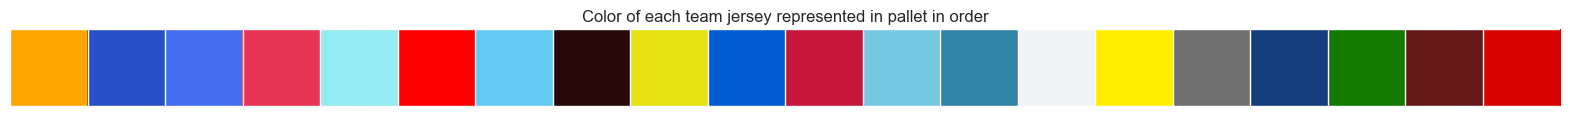

In [8]:
# Generating pallet matching the team jersey home and away
flatui = ["#FFA500", "#2950c5", "#436eee", "#e53455", "#95ebf4", "#ff0000", "#65caf2", "#260808", "#e8e114", "#005cd3", "#c6173a", "#76c7e2", "#3084a8", "#f2f3f7", "#ffee00", "#707070", "#153e7c", "#137a01", "#661a1a", "#d80404"]
sns.palplot(sns.color_palette(flatui))

plt.title('Color of each team jersey represented in pallet in order')

plt.show()

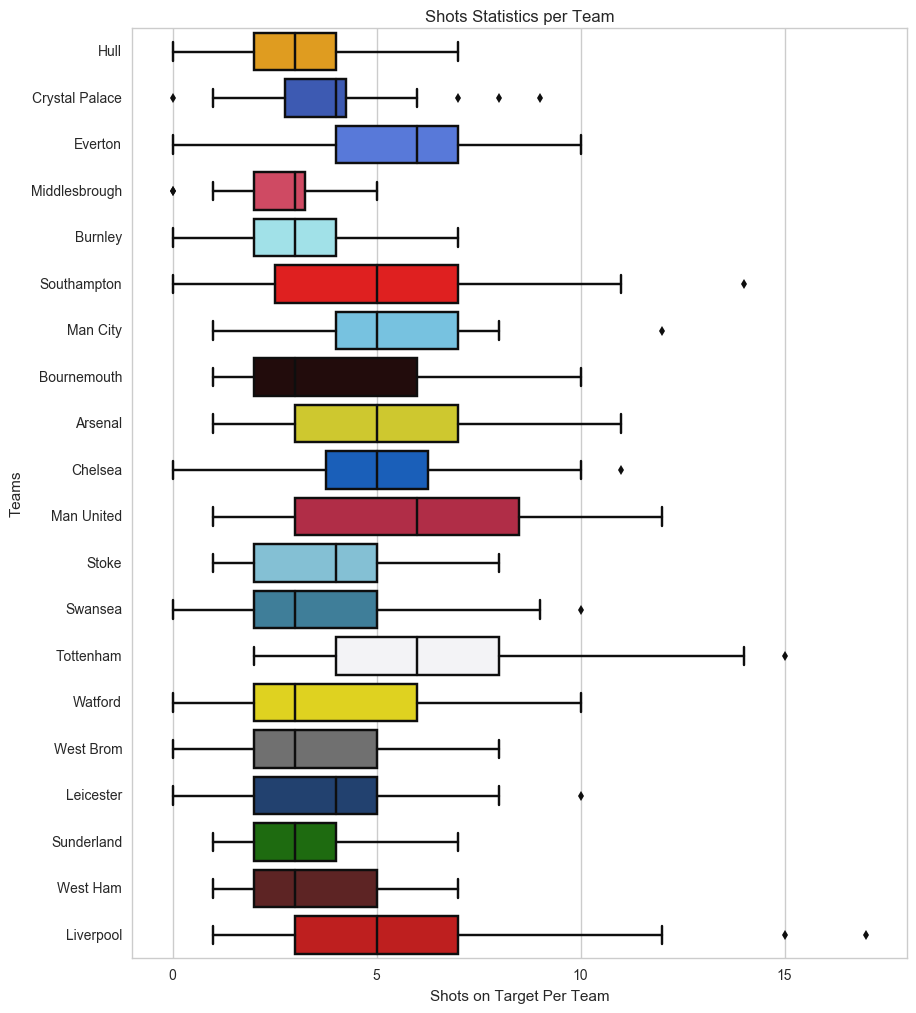

In [9]:
# Plot the violin plot for team versus number of shots taken
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,12))

ax = sns.boxplot(x="shots", y="team", data=team_df, palette=flatui)

plt.title('Shots Statistics per Team')
ax.set(xlabel='Shots on Target Per Team', ylabel='Teams')

# Modifying the scale
plt.xlim(-1, 18)

plt.show()

# File name
pallet_name = 'shots_per_game'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

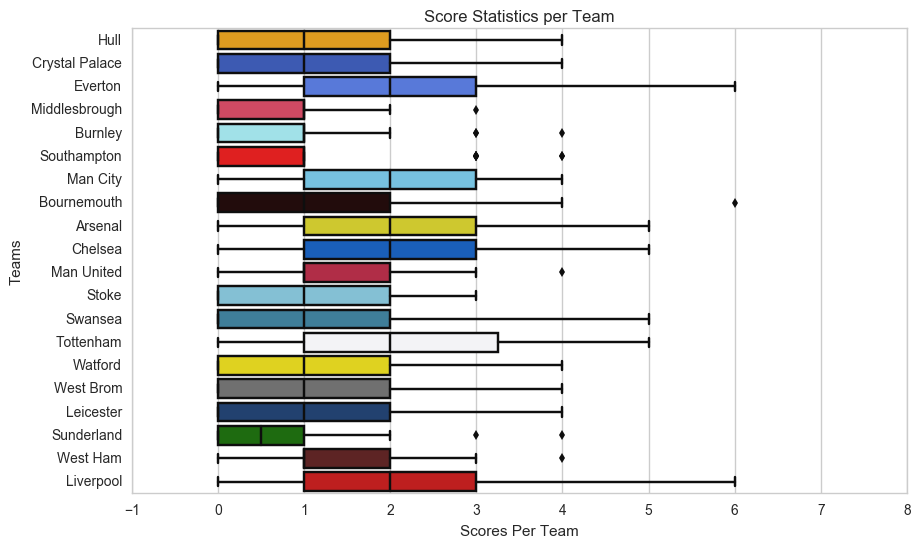

In [10]:
# Plot the box plot for team versus scores
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))

ax = sns.boxplot(x="score", y="team", data=team_df, palette=flatui)

plt.title('Score Statistics per Team')
ax.set(xlabel='Scores Per Team', ylabel='Teams')

# Modifying the scale
plt.xlim(-1, 8)

plt.show()

# File name
pallet_name = 'score_per_game'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

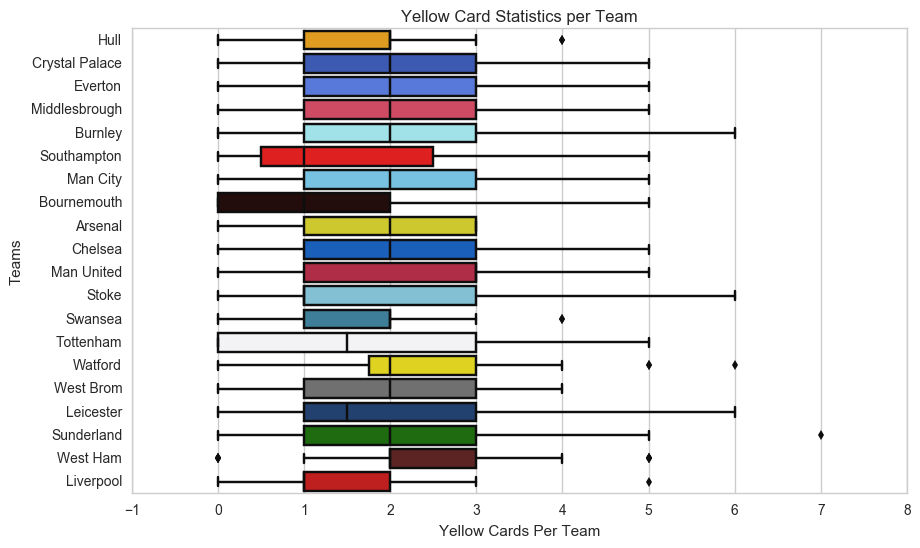

In [11]:
# Plot the box plot for team versus yellow cards
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,6))

ax = sns.boxplot(x="yellow_cards", y="team", data=team_df, palette=flatui)

plt.title('Yellow Card Statistics per Team')
ax.set(xlabel='Yellow Cards Per Team', ylabel='Teams')

# Modifying the scale
plt.xlim(-1, 8)

plt.show()

# File name
pallet_name = 'yellow_cards_per_game'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

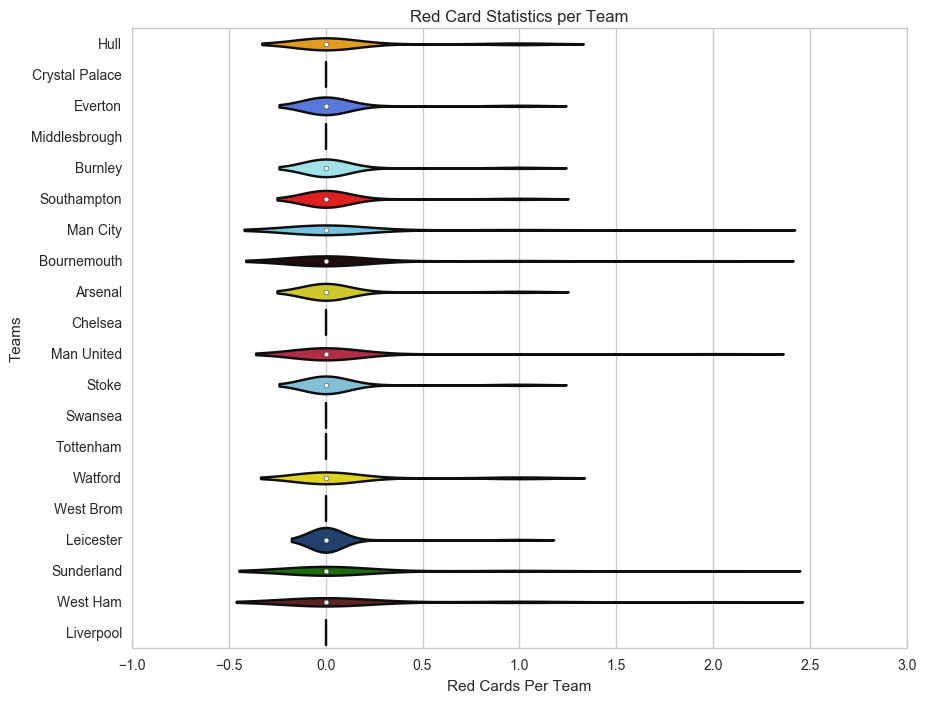

In [12]:
# Plot the box plot for team versus red cards
# Violin plot shows the kernel density estimation of the underlying distribution
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,8))

ax = sns.violinplot(x="red_cards", y="team", data=team_df, palette=flatui)

plt.title('Red Card Statistics per Team')
ax.set(xlabel='Red Cards Per Team', ylabel='Teams')

# Modifying the scale
plt.xlim(-1, 3)

plt.show()

# File name
pallet_name = 'red_cards_per_game'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
ax.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

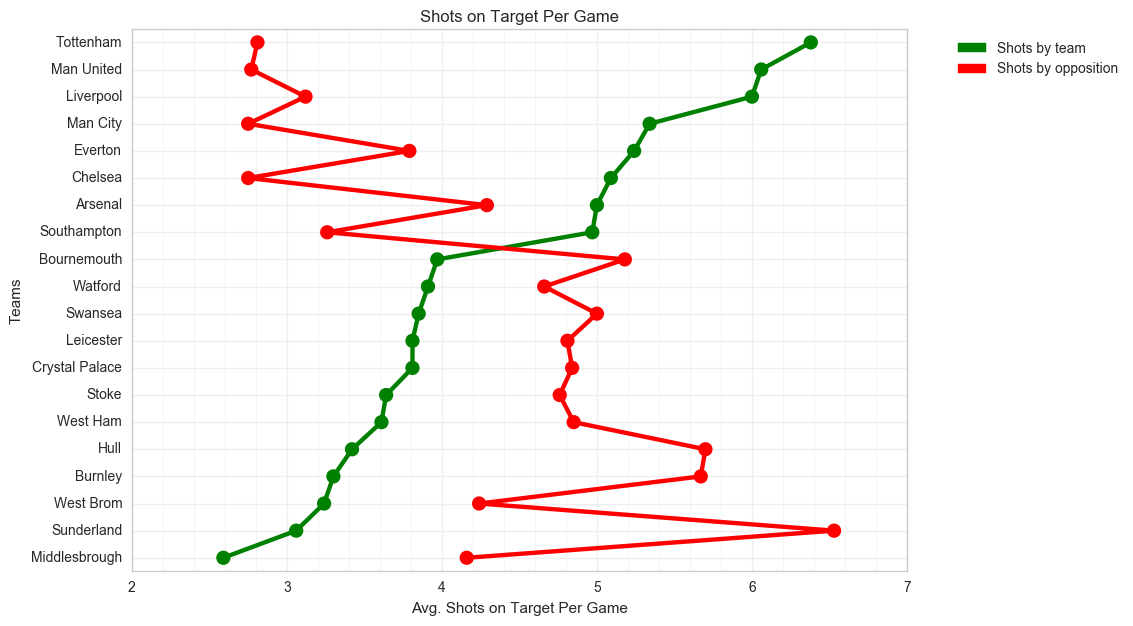

In [13]:
# 2 point plots to generate team scores and player contribution in same plot
fig = plt.figure(figsize=(10,7))
bx = sns.pointplot(x='shotsPerGame', y='team', data=data_shots, color='g')
bx = sns.pointplot(x='oppShotsPerGame', y='team', data=data_shots, color='r')

# To generate custom legends
team = mpatches.Patch(color='green', label='Shots by team')
opposition = mpatches.Patch(color='red', label='Shots by opposition')

# Beautify plot
bx.legend(handles=[team, opposition], bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Shots on Target Per Game')
bx.set(xlabel='Avg. Shots on Target Per Game', ylabel='Teams')

# To Show Gridlines 
bx.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
bx.grid(b=True, which='major', color='#efefef', linewidth=1.0)
bx.grid(b=True, which='minor', color='#efefef', linewidth=0.5)

plt.show()

# File name
pallet_name = 'shots_on_target_per_game_for_all_teams_vs_opposition'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
bx.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

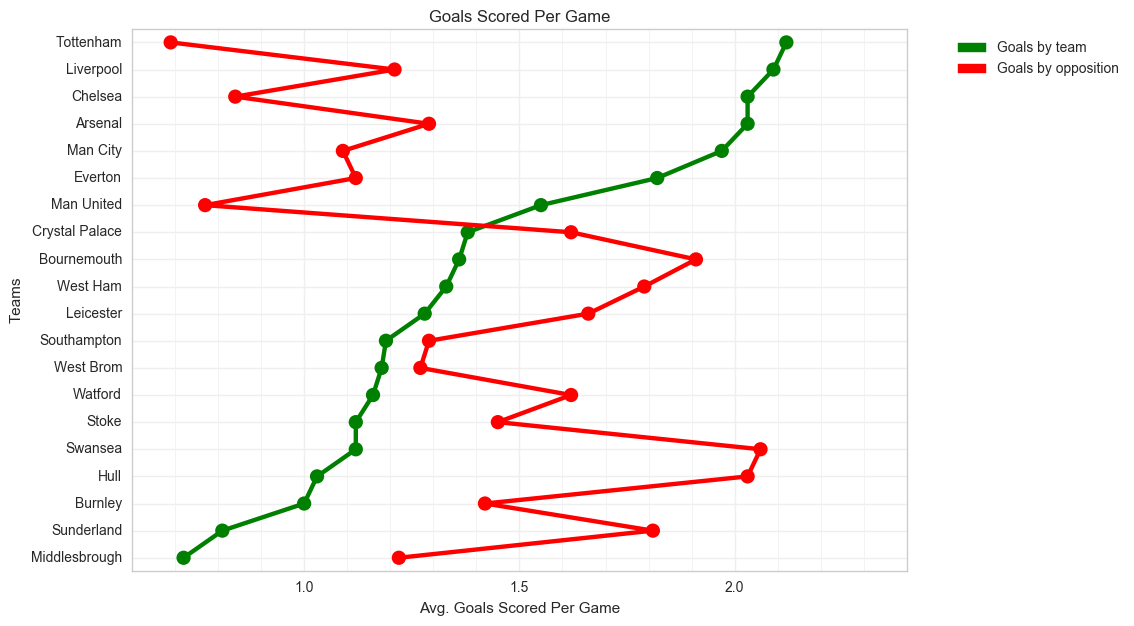

In [14]:
# 2 point plots to generate team scores and player contribution in same plot
fig = plt.figure(figsize=(10,7))
bx = sns.pointplot(x='goalsPerGame', y='team', data=data_score, color='g')
bx = sns.pointplot(x='oppGoalsPerGame', y='team', data=data_score, color='r')

# To generate custom legends
team = mpatches.Patch(color='green', label='Goals by team')
opposition = mpatches.Patch(color='red', label='Goals by opposition')

# Beautify plot
bx.legend(handles=[team, opposition], bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Goals Scored Per Game')
bx.set(xlabel='Avg. Goals Scored Per Game', ylabel='Teams')

# To Show Gridlines 
bx.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
bx.grid(b=True, which='major', color='#efefef', linewidth=1.0)
bx.grid(b=True, which='minor', color='#efefef', linewidth=0.5)

plt.show()

# File name
pallet_name = 'goals_scored_per_game_for_all_teams_vs_opposition'
pallet_path = os.path.join(output_folder, pallet_name)
pallet_path+='.png'

#Save the plot
bx.figure.savefig(pallet_path, bbox_inches='tight')   # save the figure to file

In [15]:
#csv file name and path to save team statistics
file_name = 'team_shots_performance'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
data_shots.to_csv(file_path,index = False)

#csv file name and path to save team statistics
file_name = 'team_score_performance'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
data_score.to_csv(file_path,index = False)